In [47]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [49]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

## Perform API Calls

In [50]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key +"&q="

lat = []
temp = []
humidity = []
cloud = []
wind = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
    except:
        "Null"

In [52]:
# Build DF to visualize table

quickview = {"Cities": cities,
           "Lat": lat,
           "Temp": temp,
           "Humidity": humidity,
           "Cloud": cloud,
           "Wind": wind}
quickview_df = pd.DataFrame.from_dict(quickview, orient='index')
quickview_df = quickview_df.transpose()
quickview_df = quickview_df.dropna()
quickview_df.to_csv("output data/city_details.csv")
quickview_df.head()

,Cities,Lat,Temp,Humidity,Cloud,Wind
0,saint george,39.45,77,69,20,4.7
1,point pedro,9.82,82.24,98,24,22.17
2,punta arenas,-53.16,35.6,80,40,28.86
3,waverley,-33.9,50.81,50,0,16.11
4,meyungs,69.44,51.8,93,90,4.7


## Visualization

In [58]:
# Set up x & y values

x_latitude = quickview_df['Lat']
y_temperature = quickview_df['Temp']
y_humidity = quickview_df['Humidity']
y_cloud = quickview_df['Cloud']
y_wind = quickview_df['Wind']

### Temperature (F) vs. Latitude

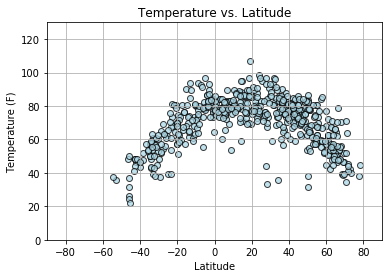

In [54]:
plt.scatter(x_latitude, y_temperature, marker="o", facecolors="lightblue", edgecolors="black", alpha=0.75)
plt.title("Temperature vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

plt.grid(True)
plt.ylim(0,130)
plt.xlim(-90,90)

plt.savefig("output data/Temperature vs Lat.png")
plt.show()

### Humidity (%) vs. Latitude

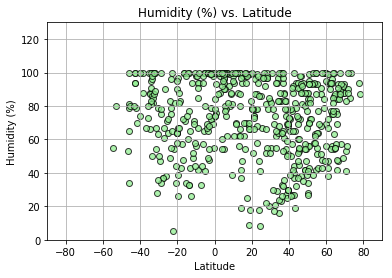

In [55]:
plt.scatter(x_latitude, y_humidity, marker="o", facecolors="lightgreen", edgecolors="black", alpha=0.75)
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

plt.grid(True)
plt.ylim(0,130)
plt.xlim(-90,90)

plt.savefig("output data/Humidity vs Lat.png")
plt.show()

### Cloudiness (%) vs. Latitude

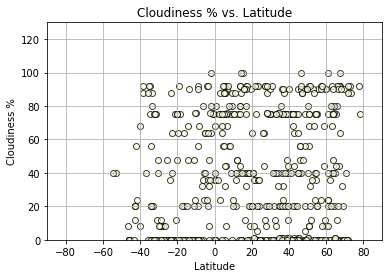

In [56]:
plt.scatter(x_latitude, y_cloud, marker="o", facecolors="lightyellow", edgecolors="black", alpha=0.75)
plt.title("Cloudiness % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")

plt.grid(True)
plt.ylim(0,130)
plt.xlim(-90,90)

plt.savefig("output data/Cloudiness vs Lat.png")
plt.show()

### Wind Speed (mph) vs. Latitude

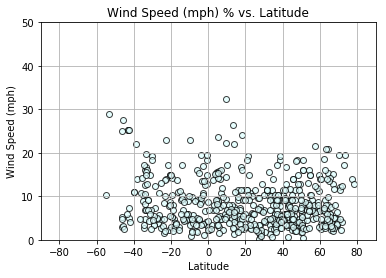

In [57]:
plt.scatter(x_latitude, y_wind, marker="o", facecolors="lightcyan", edgecolors="black", alpha=0.75)
plt.title("Wind Speed (mph) % vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

plt.grid(True)
plt.ylim(0,50)
plt.xlim(-90,90)

plt.savefig("output data/Wind Speed vs Lat.png")
plt.show()